#linear regression

In [ ]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [ ]:
df = pd.read_excel("/content/compactiv.xlsx")

In [ ]:
df.shape

(8192, 22)

In [ ]:
df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [ ]:
df.describe (include= 'all')

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
count,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8.088000e+03,8.177000e+03,8192.000000,...,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192,8192.000000,8.192000e+03,8192.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Not_CPU_Bound,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4331,NaN,NaN,NaN
mean,19.559692,13.106201,2306.318237,210.479980,150.058228,1.884554,2.791998,1.973857e+05,9.590299e+04,2.285317,...,21.526849,1.127505,8.277960,12.388586,109.793799,185.315796,NaN,1763.456299,1.328126e+06,83.968872
std,53.353799,29.891726,1633.617322,198.980146,160.478980,2.479493,5.212456,2.398375e+05,1.408417e+05,5.307038,...,71.141340,5.708347,13.874978,22.281318,114.419221,191.000603,NaN,2482.104511,4.220194e+05,18.401905
min,0.000000,0.000000,109.000000,6.000000,7.000000,0.000000,0.000000,2.780000e+02,1.498000e+03,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,NaN,55.000000,2.000000e+00,0.000000
25%,2.000000,0.000000,1012.000000,86.000000,63.000000,0.400000,0.200000,3.409150e+04,2.291600e+04,0.000000,...,0.000000,0.000000,0.600000,0.600000,25.000000,45.400000,NaN,231.000000,1.042624e+06,81.000000
50%,7.000000,1.000000,2051.500000,166.000000,117.000000,0.800000,1.200000,1.254735e+05,4.661900e+04,0.000000,...,0.000000,0.000000,2.800000,3.800000,63.800000,120.400000,NaN,579.000000,1.289290e+06,89.000000
75%,20.000000,10.000000,3317.250000,279.000000,185.000000,2.200000,2.800000,2.678288e+05,1.061010e+05,2.400000,...,0.000000,0.600000,9.765000,13.800000,159.600000,251.800000,NaN,2002.250000,1.730380e+06,94.000000


In [ ]:
df['runqsz'].value_counts().sort_values()

CPU_Bound        3861
Not_CPU_Bound    4331
Name: runqsz, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns= ['runqsz'], drop_first=True)

In [ ]:
df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_Not_CPU_Bound
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,4670,1730946,95,0
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,7278,1869002,97,1
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,702,1021237,87,1
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,7248,1863704,98,1
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,633,1760253,90,1


In [ ]:
df.isnull().sum()

lread                     0
lwrite                    0
scall                     0
sread                     0
swrite                    0
fork                      0
exec                      0
rchar                   104
wchar                    15
pgout                     0
ppgout                    0
pgfree                    0
pgscan                    0
atch                      0
pgin                      0
ppgin                     0
pflt                      0
vflt                      0
freemem                   0
freeswap                  0
usr                       0
runqsz_Not_CPU_Bound      0
dtype: int64

In [ ]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()  

lread                   0
lwrite                  0
scall                   0
sread                   0
swrite                  0
fork                    0
exec                    0
rchar                   0
wchar                   0
pgout                   0
ppgout                  0
pgfree                  0
pgscan                  0
atch                    0
pgin                    0
ppgin                   0
pflt                    0
vflt                    0
freemem                 0
freeswap                0
usr                     0
runqsz_Not_CPU_Bound    0
dtype: int64

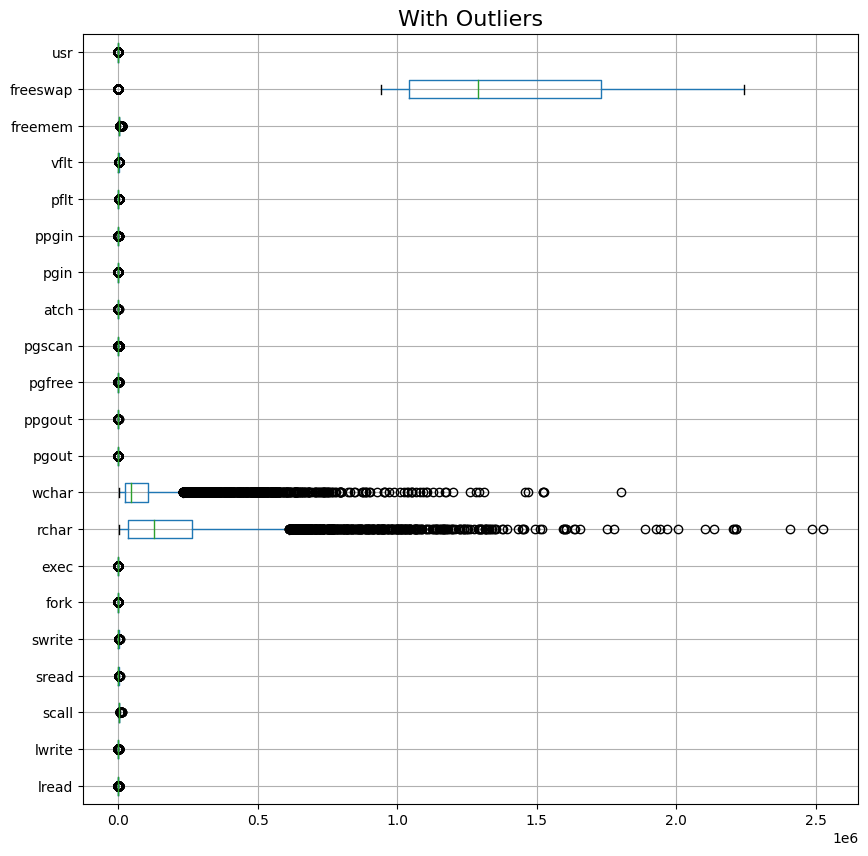

In [ ]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:

for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

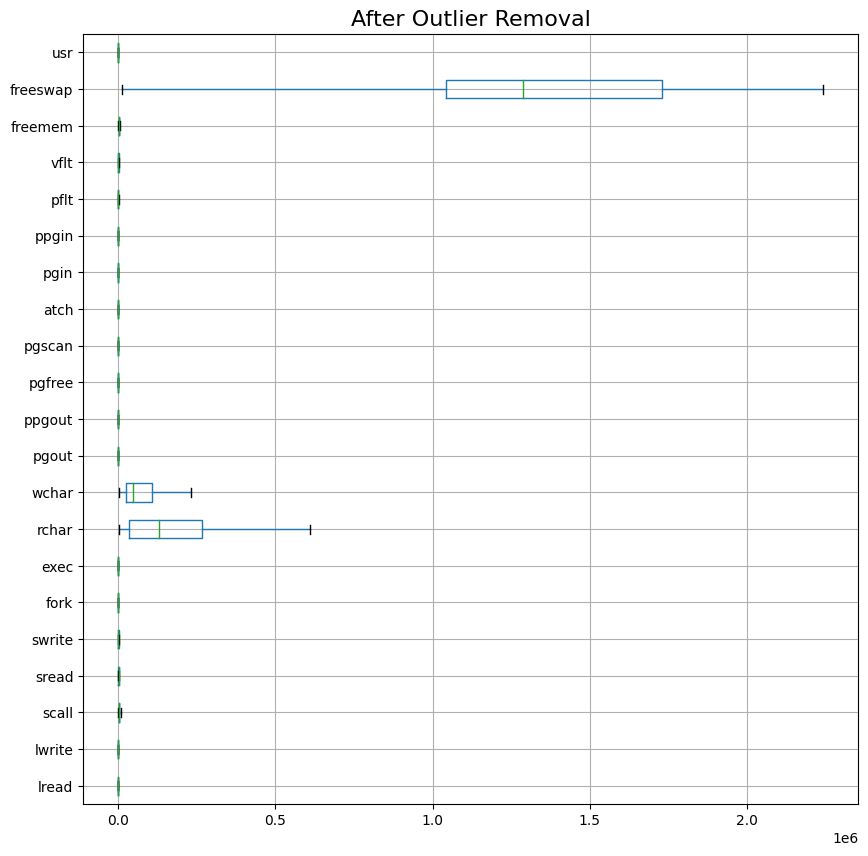

In [ ]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [ ]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


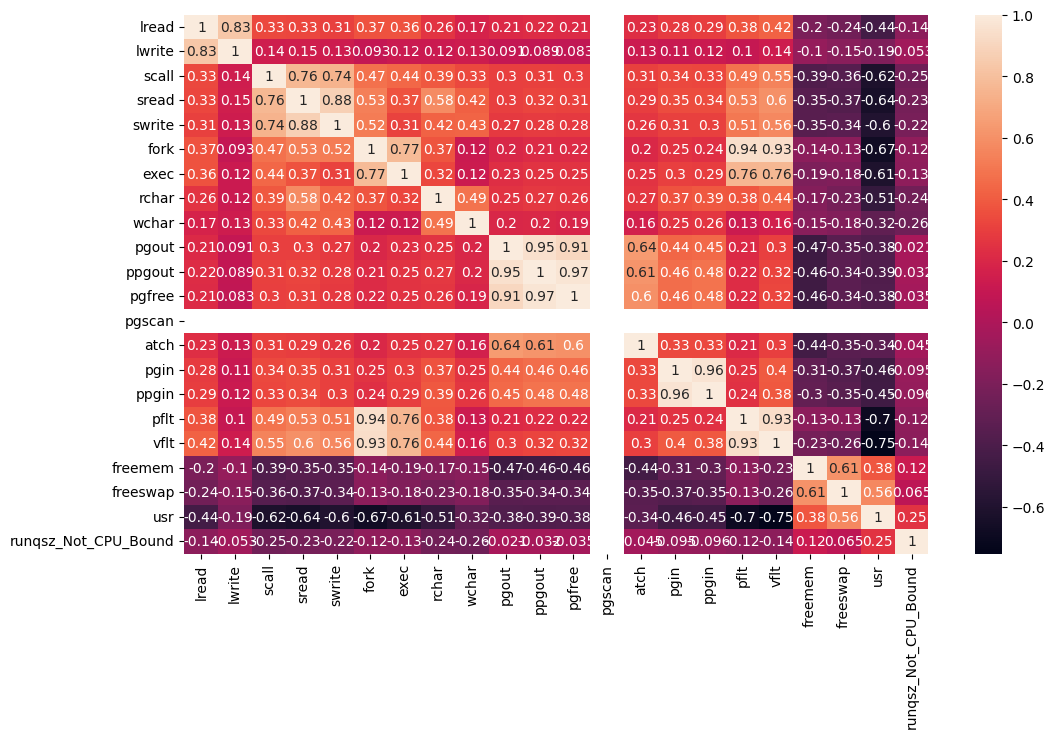

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,)
plt.show()

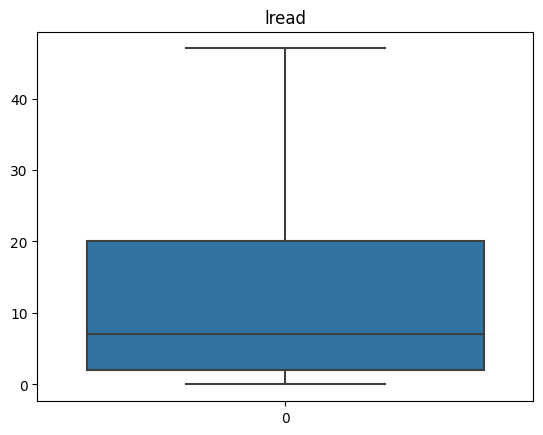

In [ ]:
sns.boxplot (df['lread'])
plt.title ('lread');

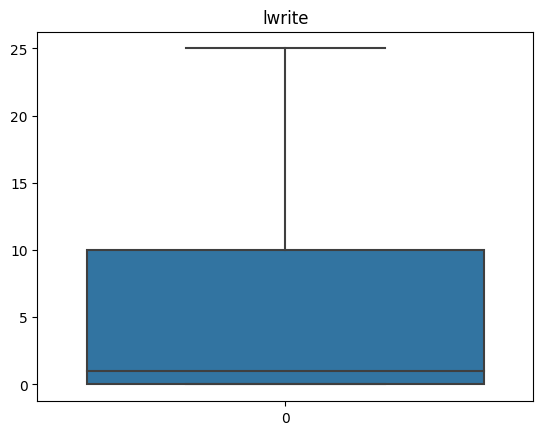

In [ ]:
sns.boxplot (df['lwrite'])
plt.title ('lwrite');

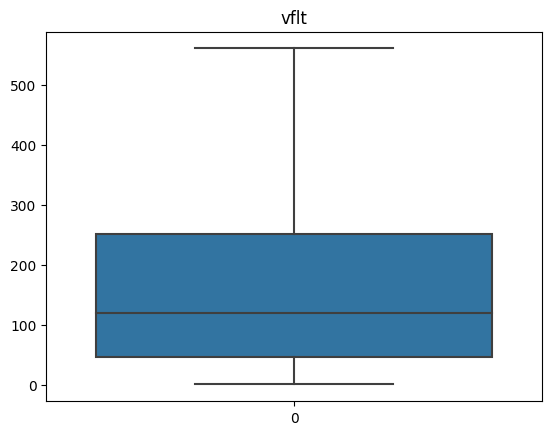

In [ ]:

sns.boxplot (df['vflt'])
plt.title ('vflt');

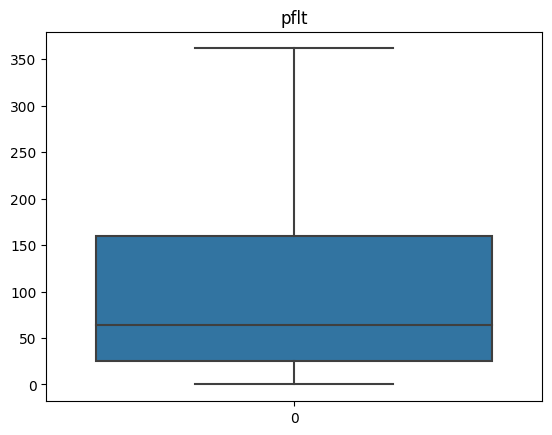

In [ ]:



sns.boxplot (df['pflt'])
plt.title ('pflt');

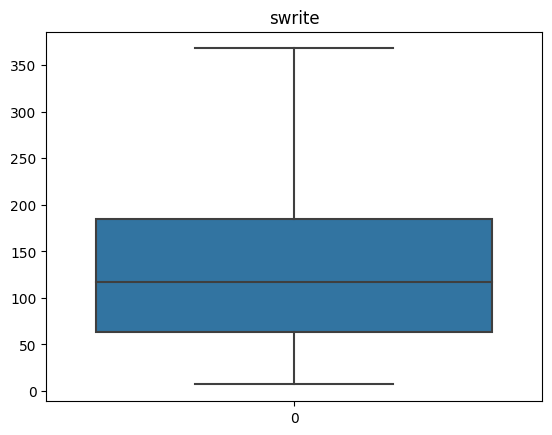

In [ ]:




sns.boxplot (df['swrite'])
plt.title ('swrite');

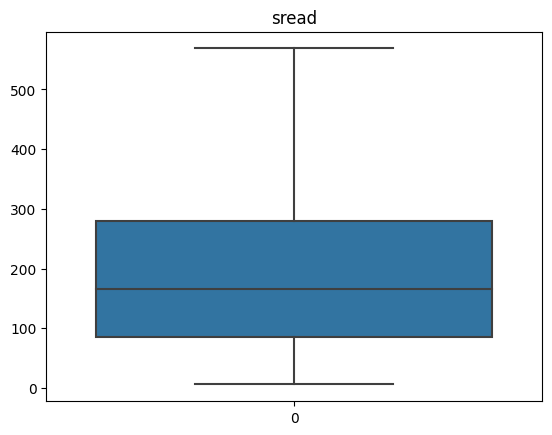

In [ ]:


sns.boxplot (df['sread'])
plt.title ('sread');

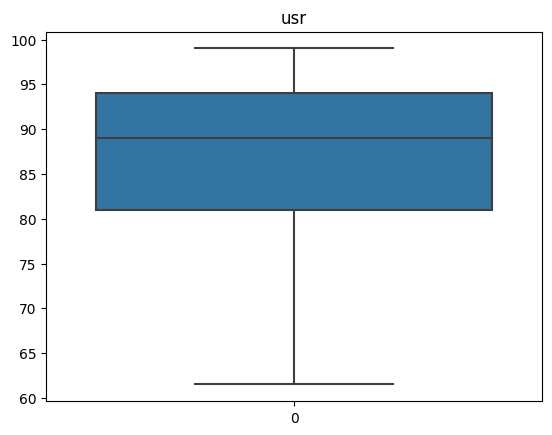

In [ ]:
sns.boxplot (df['usr'])
plt.title ('usr');

In [ ]:
X = df.drop('usr', axis=1)

y = df[['usr']]

In [ ]:
X.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,runqsz_Not_CPU_Bound
0,1.0,0.0,2147.0,79.0,68.0,0.2,0.2,40671.000000,53995.0,0.0,...,0.0,0.0,0.0,1.6,2.6,16.00,26.40,4659.125,1730946.0,0
1,0.0,0.0,170.0,18.0,21.0,0.2,0.2,448.000000,8385.0,0.0,...,0.0,0.0,0.0,0.0,0.0,15.63,16.83,4659.125,1869002.0,1
2,15.0,3.0,2162.0,159.0,119.0,2.0,2.4,197385.728363,31950.0,0.0,...,0.0,0.0,1.2,6.0,9.4,150.20,220.20,702.000,1021237.0,1
3,0.0,0.0,160.0,12.0,16.0,0.2,0.2,197385.728363,8670.0,0.0,...,0.0,0.0,0.0,0.2,0.2,15.60,16.80,4659.125,1863704.0,1
4,5.0,1.0,330.0,39.0,38.0,0.4,0.4,197385.728363,12185.0,0.0,...,0.0,0.0,0.0,1.0,1.2,37.80,47.60,633.000,1760253.0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
regression_model.coef_[0]

array([-6.34099732e-02,  4.80183861e-02, -6.64352337e-04,  3.38587579e-04,
       -5.45988181e-03,  2.96329957e-02, -3.21063250e-01, -5.21187916e-06,
       -5.34633546e-06, -3.66852298e-01, -7.86092007e-02,  8.52582013e-02,
       -2.22044605e-16,  6.30438035e-01,  1.97538559e-02, -6.71537211e-02,
       -3.35919897e-02, -5.46492175e-03, -4.57661401e-04,  8.82932042e-06,
        1.61373724e+00])

In [ ]:
for idx,col_name in enumerate(X_train.columns):
    print(idx,col_name)

0 lread
1 lwrite
2 scall
3 sread
4 swrite
5 fork
6 exec
7 rchar
8 wchar
9 pgout
10 ppgout
11 pgfree
12 pgscan
13 atch
14 pgin
15 ppgin
16 pflt
17 vflt
18 freemem
19 freeswap
20 runqsz_Not_CPU_Bound


In [ ]:
regression_model.coef_[0][0]

-0.06340997319297138

In [ ]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 84.13143842097531


In [ ]:
regression_model.score(X_train, y_train)

0.7961565330395104

In [ ]:
regression_model.score(X_test, y_test)

0.7676695029858491

In [ ]:
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

4.4190166755430935

In [ ]:
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

4.652920160995822

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)

In [ ]:
model = sm.OLS(y_train,X_train).fit()
model

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1116.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:56:43   Log-Likelihood:                -16656.
No. Observations:                5734   AIC:                         3.335e+04
Df Residuals:                    5713   BIC:                         3.349e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1314      0.316    266.122      0.000      83.512      84.751
lread                   -0.0634      0.009     -7.064      0.000      -0.081      -0.046
lwrite                   0.0480      0.013      3.660      0.000       0.022       0.074
scall                   -0.0007   6.28e-05    -10.576      0.000      -0.001      -0.001
sread                    0.0003      0.001      0.336      0.737      -0.002       0.002
swrite                  -0.0055      0.001     -3.805      0.000      -0.008      -0.003
fork                     0.0296      0.132      0.225      0.822      -0.229       0.288
exec                    -0.3211      0.052     -6.219      0.000      -0.422      -0.220
rchar                -5.212e-06   4.87e-07    -10.696      0.000   -6.17e-06   -4.26e-06
wchar                -5.346e-06   1.03e-06     -5.179      0.000   -7.37e-06   -3.32e-06
pgout                   -0.3669      0.090     -4.077      0.000      -0.543      -0.190
ppgout                  -0.0786      0.079     -0.999      0.318      -0.233       0.076
pgfree                   0.0853      0.048      1.786      0.074      -0.008       0.179
pgscan               -8.455e-15   4.41e-17   -191.744      0.000   -8.54e-15   -8.37e-15
atch                     0.6304      0.143      4.414      0.000       0.350       0.910
pgin                     0.0198      0.028      0.695      0.487      -0.036       0.076
ppgin                   -0.0672      0.020     -3.406      0.001      -0.106      -0.029
pflt                    -0.0336      0.002    -16.954      0.000      -0.037      -0.030
vflt                    -0.0055      0.001     -3.831      0.000      -0.008      -0.003
freemem                 -0.0005   5.07e-05     -9.022      0.000      -0.001      -0.000
freeswap              8.829e-06    1.9e-07     46.463      0.000    8.46e-06     9.2e-06
runqsz_Not_CPU_Bound     1.6137      0.126     12.807      0.000       1.367       1.861
==============================================================================
Omnibus:                     1102.551   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2367.549
Skew:                          -1.118   Prob(JB):                         0.00
Kurtosis:                       5.216   Cond. No.                     1.64e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.24e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
predicted_train=model.predict(X_train)
mse=metrics.mean_squared_error(y_train,predicted_train)

In [ ]:
np.sqrt(mse)

4.419402539206893

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse=metrics.mean_squared_error(y_test,y_pred)
np.sqrt(mse)

4.652920160996985

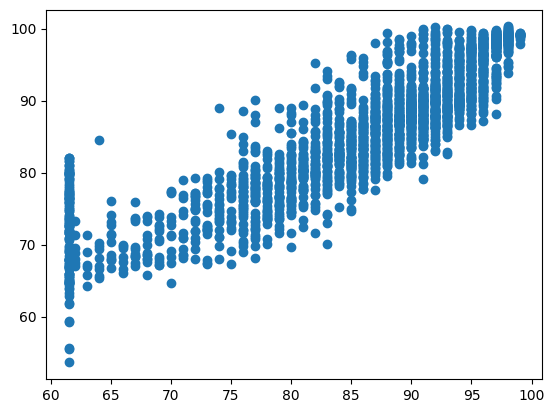

In [ ]:
plt.scatter(y_test, y_pred)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
X = add_constant(df)
>>> pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


const                   372.858009
lread                     5.270589
lwrite                    4.270883
scall                     3.048184
sread                     6.517820
swrite                    5.653767
fork                     12.947443
exec                      3.152680
rchar                     2.124421
wchar                     1.613925
pgout                    11.523584
ppgout                   30.685991
pgfree                   17.183285
pgscan                         NaN
atch                      1.866071
pgin                     13.735613
ppgin                    13.988239
pflt                     12.084363
vflt                     15.249589
freemem                   1.999507
freeswap                  2.576614
usr                       4.724006
runqsz_Not_CPU_Bound      1.184085
dtype: float64

In [ ]:
X_train2 = X_train.drop(["fork"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [ ]:
X_train3 = X_train.drop(["pgout"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [ ]:
X_train4 = X_train.drop(["ppgout"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train4)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [ ]:
X_train5 = X_train.drop(["pgfree"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train5)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [ ]:
X_train6 = X_train.drop(["pgin"], axis=1)
olsmod_5 = sm.OLS(y_train, X_train6)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [ ]:
X_train7 = X_train.drop(["ppgin"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train7)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [ ]:
X_train8 = X_train.drop(["pflt"], axis=1)
olsmod_7 = sm.OLS(y_train, X_train8)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)

R-squared: 0.786 
Adjusted R-squared: 0.785


In [ ]:
X_train9 = X_train.drop(["vflt"], axis=1)
olsmod_8 = sm.OLS(y_train, X_train9)
olsres_8 = olsmod_8.fit()
print(
    "R-squared:",
    np.round(olsres_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_8.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [ ]:
X_train = X_train.drop(["ppgout"], axis=1)

In [ ]:
olsmod_2 = sm.OLS(y_train, X_train)
olsres_2 = olsmod_5.fit()
print(olsres_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1174.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:59:38   Log-Likelihood:                -16657.
No. Observations:                5734   AIC:                         3.335e+04
Df Residuals:                    5714   BIC:                         3.349e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1477 

In [ ]:
X = add_constant(df)
>>> pd.Series([variance_inflation_factor(X_train.values, i) 
               for i in range(X_train.shape[1])], 
              index=X_train.columns)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


const                   29.032870
lread                    5.350047
lwrite                   4.328043
scall                    2.960539
sread                    6.415504
swrite                   5.594015
fork                    13.027207
exec                     3.238925
rchar                    2.129451
wchar                    1.579945
pgout                    6.454277
pgfree                   6.172906
pgscan                        NaN
atch                     1.875900
pgin                    13.784432
ppgin                   13.898089
pflt                    12.001532
vflt                    15.964611
freemem                  1.959604
freeswap                 1.838299
runqsz_Not_CPU_Bound     1.156712
dtype: float64

In [ ]:
X_train = X_train.drop(["vflt"], axis=1)

In [ ]:
olsmod_8 = sm.OLS(y_train, X_train)
olsres_8 = olsmod_8.fit()
print(olsres_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1236.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:55:31   Log-Likelihood:                -16664.
No. Observations:                5734   AIC:                         3.337e+04
Df Residuals:                    5715   BIC:                         3.349e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0194 

In [ ]:
X = add_constant(df)
>>> pd.Series([variance_inflation_factor(X_train.values, i) 
               for i in range(X_train.shape[1])], 
              index=X_train.columns)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


const                   28.653594
lread                    5.335051
lwrite                   4.326838
scall                    2.953114
sread                    6.369489
swrite                   5.592704
fork                    10.089022
exec                     3.235111
rchar                    2.119944
wchar                    1.558137
pgout                    6.451027
pgfree                   6.149320
pgscan                        NaN
atch                     1.864582
pgin                    13.602664
ppgin                   13.898088
pflt                     9.132270
freemem                  1.958294
freeswap                 1.787867
runqsz_Not_CPU_Bound     1.156656
dtype: float64

In [ ]:
X_train = X_train.drop(["ppgin"], axis=1)

In [ ]:
olsmod_6 = sm.OLS(y_train, X_train)
olsres_6 = olsmod_6.fit()
print(olsres_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1305.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:55:32   Log-Likelihood:                -16670.
No. Observations:                5734   AIC:                         3.338e+04
Df Residuals:                    5716   BIC:                         3.350e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0638 

In [ ]:
X = add_constant(df)
>>> pd.Series([variance_inflation_factor(X_train.values, i) 
               for i in range(X_train.shape[1])], 
              index=X_train.columns)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


const                   28.605874
lread                    5.303607
lwrite                   4.316085
scall                    2.951995
sread                    6.369370
swrite                   5.592604
fork                    10.074242
exec                     3.235101
rchar                    2.086720
wchar                    1.558135
pgout                    6.445748
pgfree                   6.093664
pgscan                        NaN
atch                     1.863857
pgin                     1.528544
pflt                     9.132014
freemem                  1.958045
freeswap                 1.785549
runqsz_Not_CPU_Bound     1.156279
dtype: float64

In [ ]:
X_train = X_train.drop(["fork"], axis=1)

In [ ]:
olsmod_1 = sm.OLS(y_train, X_train)
olsres_1 = olsmod_1.fit()
print(olsres_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1174.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        12:00:00   Log-Likelihood:                -16657.
No. Observations:                5734   AIC:                         3.335e+04
Df Residuals:                    5714   BIC:                         3.349e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1580 

In [ ]:
X = add_constant(df)
>>> pd.Series([variance_inflation_factor(X_train.values, i) 
               for i in range(X_train.shape[1])], 
              index=X_train.columns)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


const                   29.032870
lread                    5.350047
lwrite                   4.328043
scall                    2.960539
sread                    6.415504
swrite                   5.594015
fork                    13.027207
exec                     3.238925
rchar                    2.129451
wchar                    1.579945
pgout                    6.454277
pgfree                   6.172906
pgscan                        NaN
atch                     1.875900
pgin                    13.784432
ppgin                   13.898089
pflt                    12.001532
vflt                    15.964611
freemem                  1.959604
freeswap                 1.838299
runqsz_Not_CPU_Bound     1.156712
dtype: float64

In [ ]:
X_train=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)

In [ ]:
model = sm.OLS(y_train,X_train).fit()
model

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1386.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:55:36   Log-Likelihood:                -16672.
No. Observations:                5734   AIC:                         3.338e+04
Df Residuals:                    5717   BIC:                         3.349e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1020      0.313    269.063      0.000      83.489      84.715
lread                   -0.0686      0.009     -7.668      0.000      -0.086      -0.051
lwrite                   0.0526      0.013      4.015      0.000       0.027       0.078
scall                   -0.0007   6.25e-05    -10.581      0.000      -0.001      -0.001
sread                 4.316e-05      0.001      0.043      0.966      -0.002       0.002
swrite                  -0.0059      0.001     -4.151      0.000      -0.009      -0.003
exec                    -0.3582      0.049     -7.373      0.000      -0.453      -0.263
rchar                -5.565e-06   4.83e-07    -11.513      0.000   -6.51e-06   -4.62e-06
wchar                -4.803e-06   1.02e-06     -4.691      0.000   -6.81e-06    -2.8e-06
pgout                   -0.4129      0.068     -6.077      0.000      -0.546      -0.280
pgfree                   0.0305      0.029      1.048      0.295      -0.027       0.087
pgscan                3.208e-14   1.35e-16    238.102      0.000    3.18e-14    3.23e-14
atch                     0.6048      0.143      4.240      0.000       0.325       0.884
pgin                    -0.0833      0.009     -8.795      0.000      -0.102      -0.065
pflt                    -0.0396      0.001    -37.160      0.000      -0.042      -0.038
freemem                 -0.0005   5.08e-05     -9.208      0.000      -0.001      -0.000
freeswap              8.907e-06   1.87e-07     47.525      0.000    8.54e-06    9.27e-06
runqsz_Not_CPU_Bound     1.5956      0.126     12.641      0.000       1.348       1.843
==============================================================================
Omnibus:                     1042.836   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2193.307
Skew:                          -1.071   Prob(JB):                         0.00
Kurtosis:                       5.144   Cond. No.                     6.20e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.97e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
np.array(model.params.reset_index())

array([['const', 84.10200311821927],
       ['lread', -0.06856826829070475],
       ['lwrite', 0.05260590177597813],
       ['scall', -0.0006610929433803934],
       ['sread', 4.315990367998113e-05],
       ['swrite', -0.005858157364732542],
       ['exec', -0.3582041821917095],
       ['rchar', -5.564612699850155e-06],
       ['wchar', -4.802622702350043e-06],
       ['pgout', -0.4128762587046698],
       ['pgfree', 0.030485376177362314],
       ['pgscan', 3.208310561093378e-14],
       ['atch', 0.6048362550429407],
       ['pgin', -0.08333269403438105],
       ['pflt', -0.03961449331478407],
       ['freemem', -0.00046766320587904623],
       ['freeswap', 8.907385498561e-06],
       ['runqsz_Not_CPU_Bound', 1.595643273683111]], dtype=object)

In [ ]:
for i,j in np.array(model.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(84.1) * const + (-0.07) * lread + (0.05) * lwrite + (-0.0) * scall + (0.0) * sread + (-0.01) * swrite + (-0.36) * exec + (-0.0) * rchar + (-0.0) * wchar + (-0.41) * pgout + (0.03) * pgfree + (0.0) * pgscan + (0.6) * atch + (-0.08) * pgin + (-0.04) * pflt + (-0.0) * freemem + (0.0) * freeswap + (1.6) * runqsz_Not_CPU_Bound + 

#logistic regression

In [ ]:
cdf = pd.read_excel("/content/Contraceptive_method_dataset.xlsx")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay 

In [ ]:
cdf.shape

(1473, 10)

In [ ]:
cdf.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [ ]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [ ]:
dups = cdf.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(cdf.shape)

Number of duplicate rows = 80
(1473, 10)


In [ ]:
cdf.drop_duplicates(inplace=True) 

In [ ]:
dups = cdf.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(cdf.shape)

Number of duplicate rows = 0
(1393, 10)


In [ ]:
for feature in cdf.columns: 
    if cdf[feature].dtype == 'object': 
        print(feature)
        print(cdf[feature].value_counts())
        print('\n')

Wife_ education
Tertiary      577
Secondary     410
Primary       334
Uneducated    152
Name: Wife_ education, dtype: int64


Husband_education
Tertiary      899
Secondary     352
Primary       178
Uneducated     44
Name: Husband_education, dtype: int64


Wife_religion
Scientology        1253
Non-Scientology     220
Name: Wife_religion, dtype: int64


Wife_Working
No     1104
Yes     369
Name: Wife_Working, dtype: int64


Standard_of_living_index
Very High    684
High         431
Low          229
Very Low     129
Name: Standard_of_living_index, dtype: int64


Media_exposure 
Exposed        1364
Not-Exposed     109
Name: Media_exposure , dtype: int64


Contraceptive_method_used
Yes    844
No     629
Name: Contraceptive_method_used, dtype: int64




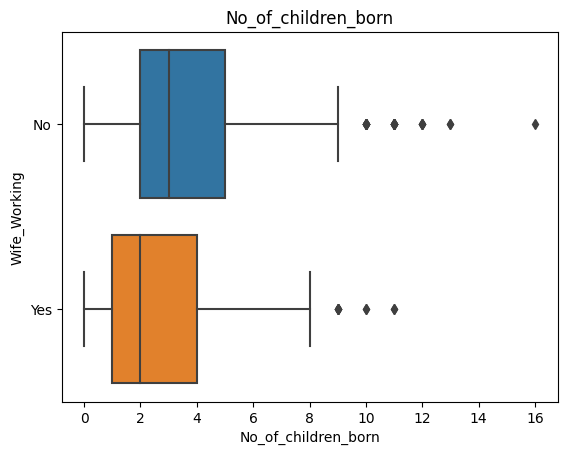

In [ ]:
sns.boxplot(x=cdf['No_of_children_born'], y=cdf['Wife_Working'], whis=1.5)
plt.title('No_of_children_born');

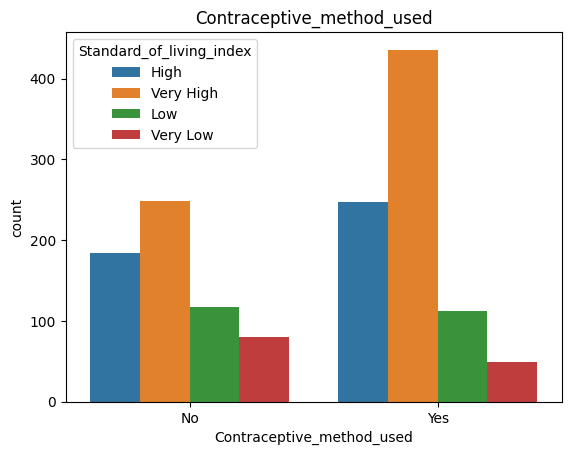

In [ ]:
 sns.countplot(x= cdf['Contraceptive_method_used'], hue= cdf['Standard_of_living_index'])
plt.title('Contraceptive_method_used');

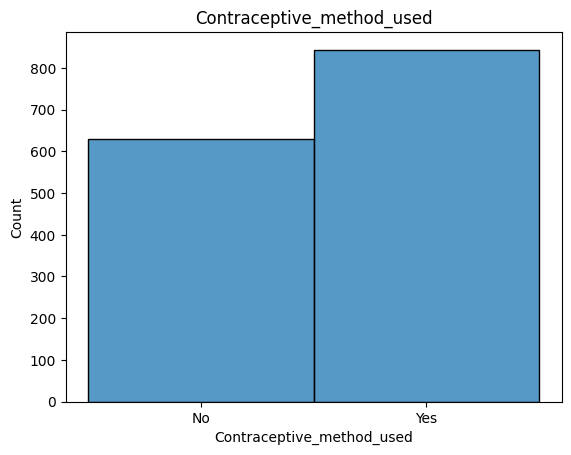

In [ ]:
 sns.histplot(cdf['Contraceptive_method_used'])
plt.title('Contraceptive_method_used');

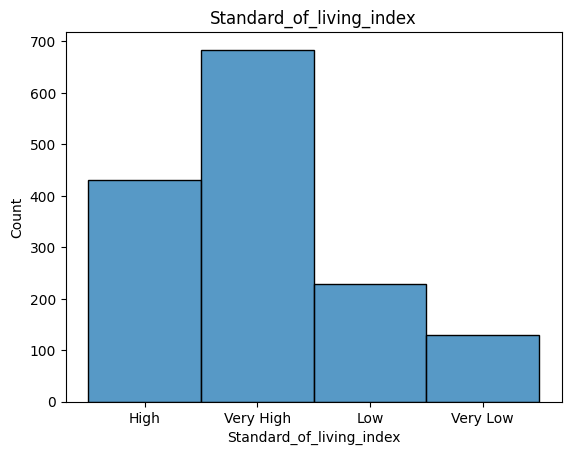

In [ ]:
 sns.histplot(cdf['Standard_of_living_index'])
plt.title('Standard_of_living_index');

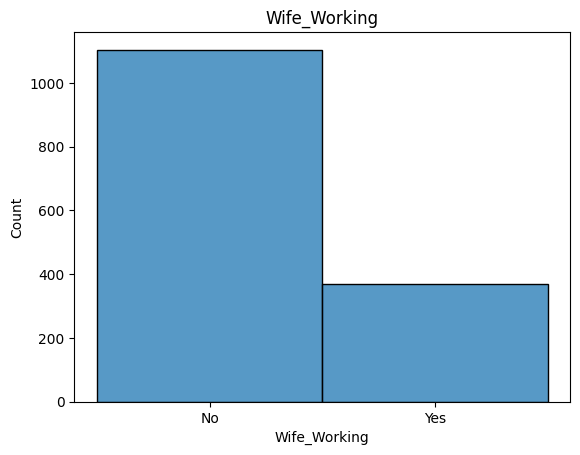

In [ ]:
 sns.histplot(cdf['Wife_Working'])
plt.title('Wife_Working');

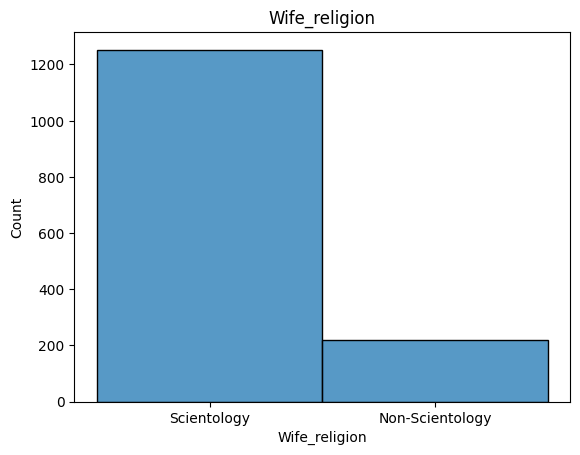

In [ ]:
 sns.histplot(cdf['Wife_religion'])
plt.title('Wife_religion');

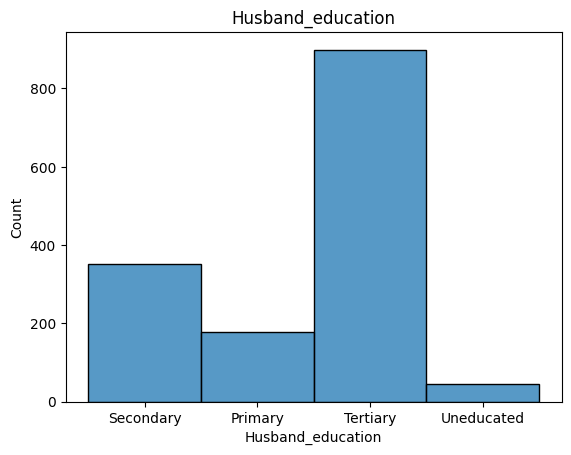

In [ ]:
 sns.histplot(cdf['Husband_education'])
plt.title('Husband_education');

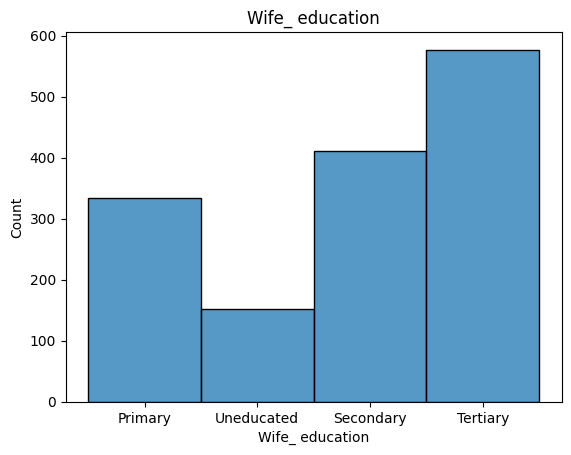

In [ ]:
 sns.histplot(cdf['Wife_ education'])
plt.title('Wife_ education');

In [ ]:
cdf.describe()

,Wife_age,No_of_children_born,Husband_Occupation
count,1326.000000,1372.000000,1393.000000
mean,32.557315,3.290816,2.174444
std,8.289259,2.399697,0.854590
min,16.000000,0.000000,1.000000
25%,26.000000,1.000000,1.000000
50%,32.000000,3.000000,2.000000
75%,39.000000,5.000000,3.000000
max,49.000000,16.000000,4.000000


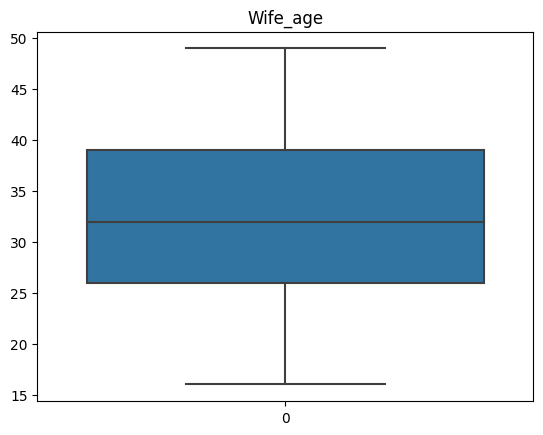

In [ ]:
sns.boxplot(cdf['Wife_age'],whis=1.5)
plt.title('Wife_age');

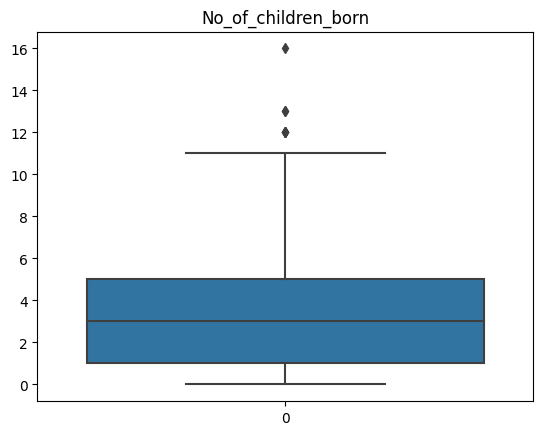

In [ ]:
sns.boxplot(cdf['No_of_children_born'],whis=1.5)
plt.title('No_of_children_born');

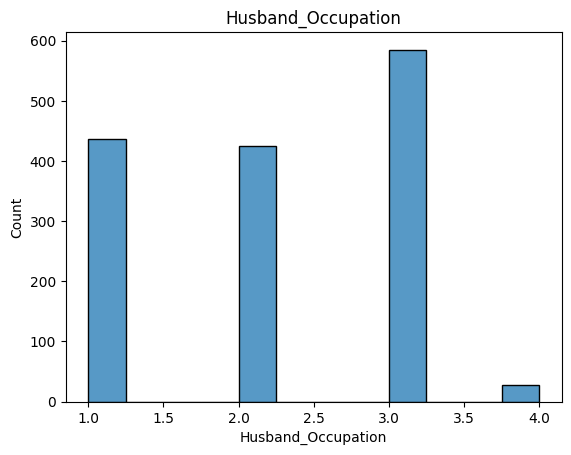

In [ ]:
 sns.histplot(cdf['Husband_Occupation'])
plt.title('Husband_Occupation');

In [ ]:
cdf.isnull().sum()

Wife_age                     67
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [ ]:
for column in cdf.columns:
    if cdf[column].dtype != 'object':
        mean = cdf[column].mean()
        cdf[column] = cdf[column].fillna(mean)    
        
cdf.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
lr,ur= remove_outlier(cdf['No_of_children_born'])
print('Lower Range :',lr,'\nUpper Range :',ur)
cdf['No_of_children_born']=np.where(cdf['No_of_children_born']>ur,ur,cdf['No_of_children_born'])
cdf['No_of_children_born']=np.where(cdf['No_of_children_born']<lr,lr,cdf['No_of_children_born'])

Lower Range : -5.0 
Upper Range : 11.0


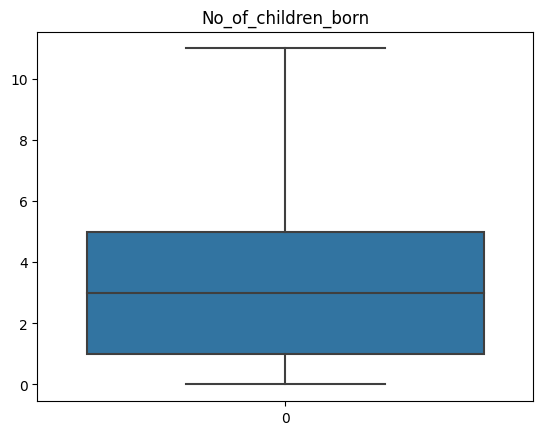

In [ ]:
sns.boxplot(cdf['No_of_children_born'],whis=1.5)
plt.title('No_of_children_born');

In [ ]:
cdf_dummy.corr()

,Wife_age,No_of_children_born,Husband_Occupation,Wife_ education_Secondary,Wife_ education_Tertiary,Wife_ education_Uneducated,Husband_education_Secondary,Husband_education_Tertiary,Husband_education_Uneducated,Wife_religion_Scientology,Wife_Working_Yes,Standard_of_living_index_Low,Standard_of_living_index_Very High,Standard_of_living_index_Very Low,Media_exposure _Not-Exposed,Contraceptive_method_used_Yes
Wife_age,1.000000,0.538013,-0.203617,-0.112962,0.072981,0.199162,-0.047796,-0.002471,0.108484,-0.142207,0.035070,-0.079511,0.170847,-0.110377,0.116733,-0.089226
No_of_children_born,0.538013,1.000000,-0.020954,-0.011641,-0.143073,0.169281,0.068418,-0.172128,0.089750,0.073649,-0.101744,0.009515,-0.010674,-0.000802,0.135801,0.118066
Husband_Occupation,-0.203617,-0.020954,1.000000,0.107744,-0.409431,0.165335,0.229225,-0.365335,0.096574,0.084417,-0.014232,0.148316,-0.271227,0.172843,0.113925,-0.062412
Wife_ education_Secondary,-0.112962,-0.011641,0.107744,1.000000,-0.498378,-0.210667,0.188337,-0.065944,-0.064486,0.039248,-0.047923,0.072151,-0.119627,0.005861,-0.071403,0.000239
Wife_ education_Tertiary,0.072981,-0.143073,-0.409431,-0.498378,1.000000,-0.272210,-0.358363,0.547114,-0.132644,-0.221713,0.081707,-0.198450,0.329243,-0.209256,-0.194973,0.200726
Wife_ education_Uneducated,0.199162,0.169281,0.165335,-0.210667,-0.272210,1.000000,0.034940,-0.323842,0.281325,0.123354,-0.015849,0.088499,-0.136847,0.123855,0.390051,-0.171861
Husband_education_Secondary,-0.047796,0.068418,0.229225,0.188337,-0.358363,0.034940,1.000000,-0.701282,-0.098328,0.114215,-0.004332,0.124229,-0.164241,0.074186,0.005792,-0.034401
Husband_education_Tertiary,-0.002471,-0.172128,-0.365335,-0.065944,0.547114,-0.323842,-0.701282,1.000000,-0.219601,-0.190316,0.005758,-0.214233,0.286221,-0.215359,-0.215510,0.129150
Husband_education_Uneducated,0.108484,0.089750,0.096574,-0.064486,-0.132644,0.281325,-0.098328,-0.219601,1.000000,0.051150,0.027405,0.056786,-0.099409,0.114933,0.163685,-0.098451
Wife_religion_Scientology,-0.142207,0.073649,0.084417,0.039248,-0.221713,0.123354,0.114215,-0.190316,0.051150,1.000000,-0.069837,0.100935,-0.201800,0.096128,0.060243,-0.072946


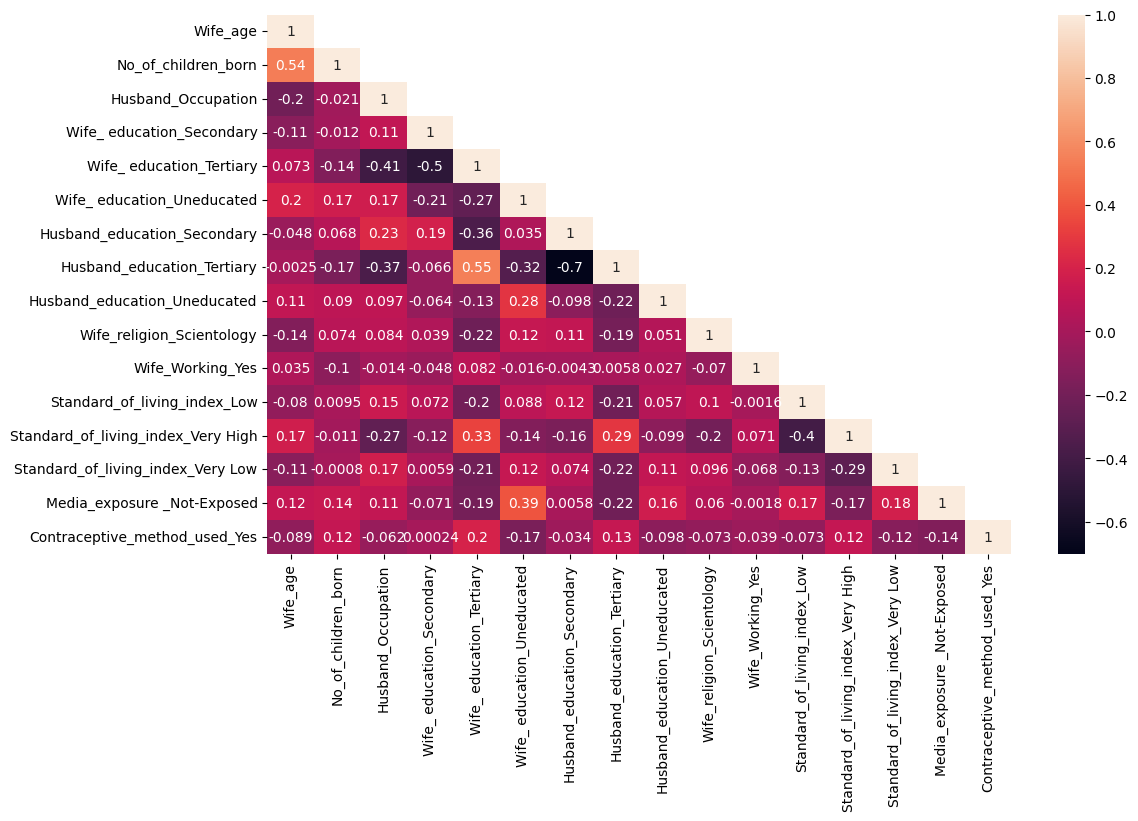

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(cdf_dummy.corr(), annot=True,mask=np.triu(cdf_dummy.corr(),+1));

In [ ]:
cdf_dummy = pd.get_dummies(cdf,drop_first=True)
cdf_dummy.head()

,Wife_age,No_of_children_born,Husband_Occupation,Wife_ education_Secondary,Wife_ education_Tertiary,Wife_ education_Uneducated,Husband_education_Secondary,Husband_education_Tertiary,Husband_education_Uneducated,Wife_religion_Scientology,Wife_Working_Yes,Standard_of_living_index_Low,Standard_of_living_index_Very High,Standard_of_living_index_Very Low,Media_exposure _Not-Exposed,Contraceptive_method_used_Yes
0,24.0,3.0,2,0,0,0,1,0,0,1,0,0,0,0,0,0
1,45.0,10.0,3,0,0,1,1,0,0,1,0,0,1,0,0,0
2,43.0,7.0,3,0,0,0,1,0,0,1,0,0,1,0,0,0
3,42.0,9.0,3,1,0,0,0,0,0,1,0,0,0,0,0,0
4,36.0,8.0,3,1,0,0,1,0,0,1,0,1,0,0,0,0


In [ ]:
X = cdf_dummy.drop('Contraceptive_method_used_Yes', axis=1)

y = cdf_dummy['Contraceptive_method_used_Yes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=cdf_dummy['Contraceptive_method_used_Yes'])

In [ ]:
y_train.value_counts(1)

1    0.558974
0    0.441026
Name: Contraceptive_method_used_Yes, dtype: float64

In [ ]:
y_test.value_counts(1)

1    0.559809
0    0.440191
Name: Contraceptive_method_used_Yes, dtype: float64

In [ ]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.7s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [ ]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [ ]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.274056,0.725944
1,0.700354,0.299646
2,0.337050,0.662950
3,0.286516,0.713484
4,0.232626,0.767374


In [ ]:
model.score(X_train, y_train)

0.68

AUC: 0.724


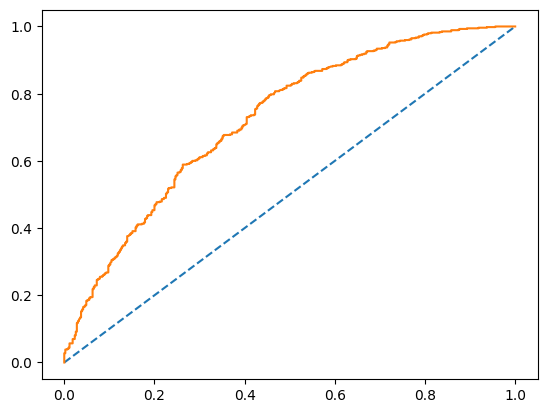

In [ ]:
probs = model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [ ]:
model.score(X_test, y_test)

0.6363636363636364

AUC: 0.724


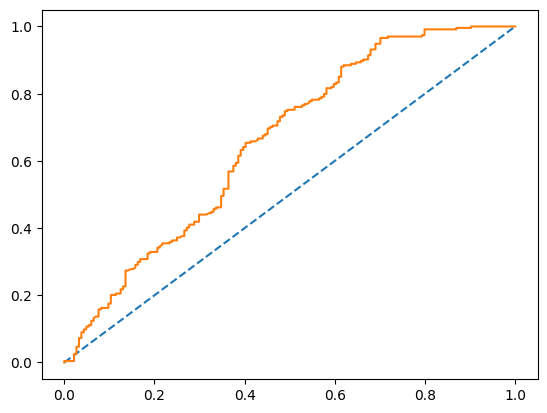

In [ ]:
probs = model.predict_proba(X_test)
probs = probs[:, 1]
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [ ]:
cm = confusion_matrix(y_train, ytrain_predict)
cm

array([[239, 191],
       [121, 424]])

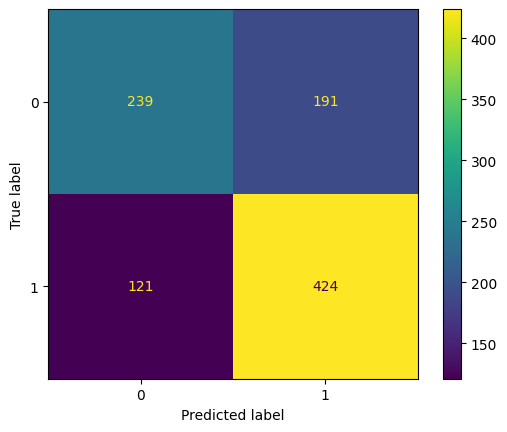

In [ ]:
disp = ConfusionMatrixDisplay ( confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.66      0.56      0.61       430
           1       0.69      0.78      0.73       545

    accuracy                           0.68       975
   macro avg       0.68      0.67      0.67       975
weighted avg       0.68      0.68      0.68       975



In [ ]:
cm_test = confusion_matrix(y_test, ytest_predict)
cm_test

array([[ 83, 101],
       [ 51, 183]])

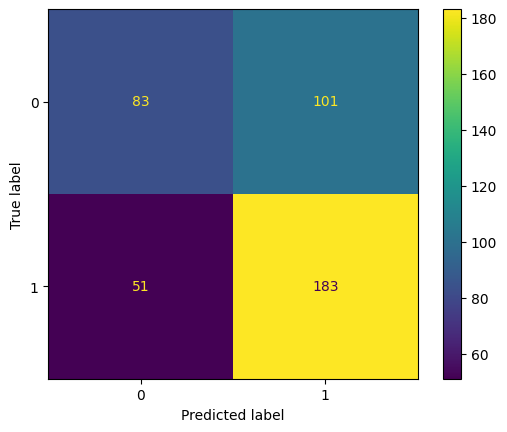

In [ ]:
disp = ConfusionMatrixDisplay ( confusion_matrix=cm_test, display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.62      0.45      0.52       184
           1       0.64      0.78      0.71       234

    accuracy                           0.64       418
   macro avg       0.63      0.62      0.61       418
weighted avg       0.63      0.64      0.63       418



#LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [ ]:
X= cdf_dummy.drop('Contraceptive_method_used_Yes', axis=1)
Y= cdf_dummy.pop('Contraceptive_method_used_Yes')

In [ ]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [ ]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [ ]:
pred_class_train = model.predict(X_train)
pred_class_test = model.predict(X_test)

<Axes: >

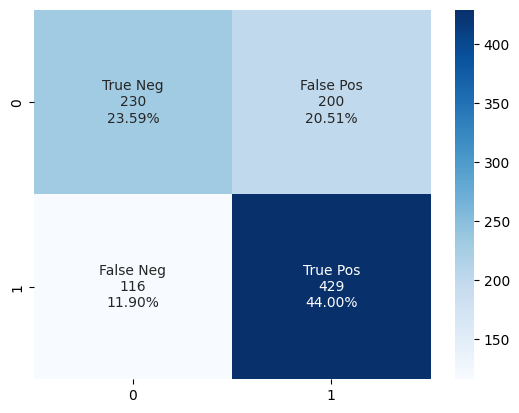

In [ ]:
cf_matrix = metrics.confusion_matrix(Y_train,pred_class_train)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.66      0.53      0.59       430
           1       0.68      0.79      0.73       545

    accuracy                           0.68       975
   macro avg       0.67      0.66      0.66       975
weighted avg       0.67      0.68      0.67       975
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.61      0.43      0.50       184
           1       0.64      0.79      0.70       234

    accuracy                           0.63       418
   macro avg       0.62      0.61      0.60       418
weighted avg       0.63      0.63      0.62       418
 



In [ ]:
pred_prob_train = model.predict_proba(X_train)

pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.723
AUC for the Test Data: 0.658


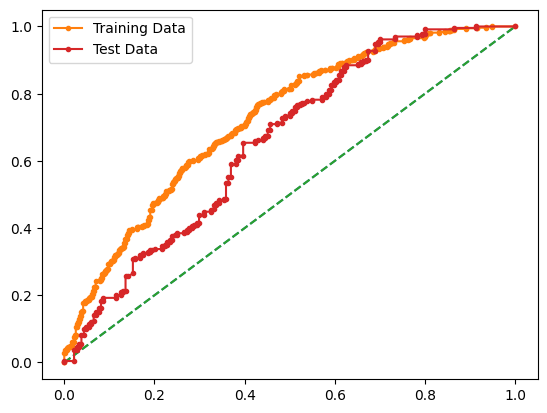

In [ ]:

auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr, marker='.',label = 'Training Data')

auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr, marker='.',label='Test Data')

plt.legend(loc='best')
plt.show()

In [ ]:
clf.intercept_ 

array([1.04546371])

In [ ]:
for x,y in zip(X.columns,clf.coef_[0]):
    print(x,":",np.round(y,2))

Wife_age : -0.08
No_of_children_born : 0.33
Husband_Occupation : 0.15
Wife_ education_Secondary : 0.44
Wife_ education_Tertiary : 1.17
Wife_ education_Uneducated : -0.29
Husband_education_Secondary : 0.34
Husband_education_Tertiary : 0.26
Husband_education_Uneducated : 0.36
Wife_religion_Scientology : -0.44
Wife_Working_Yes : -0.18
Standard_of_living_index_Low : -0.36
Standard_of_living_index_Very High : 0.34
Standard_of_living_index_Very Low : -0.52
Media_exposure _Not-Exposed : -0.41


#cart

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
for feature in cdf_dummy.columns: 
    if cdf_dummy[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(cdf_dummy[feature].unique()))
        print(pd.Categorical(cdf_dummy[feature].unique()).codes)
        cdf_dummy[feature] = pd.Categorical(cdf_dummy[feature]).codes

In [ ]:
cdf_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Wife_age                            1393 non-null   float64
 1   No_of_children_born                 1393 non-null   float64
 2   Husband_Occupation                  1393 non-null   int64  
 3   Wife_ education_Secondary           1393 non-null   uint8  
 4   Wife_ education_Tertiary            1393 non-null   uint8  
 5   Wife_ education_Uneducated          1393 non-null   uint8  
 6   Husband_education_Secondary         1393 non-null   uint8  
 7   Husband_education_Tertiary          1393 non-null   uint8  
 8   Husband_education_Uneducated        1393 non-null   uint8  
 9   Wife_religion_Scientology           1393 non-null   uint8  
 10  Wife_Working_Yes                    1393 non-null   uint8  
 11  Standard_of_living_index_Low        1393 no

In [ ]:
X = cdf_dummy.drop("Contraceptive_method_used_Yes", axis=1)

y = cdf_dummy.pop("Contraceptive_method_used_Yes")

X.head()

,Wife_age,No_of_children_born,Husband_Occupation,Wife_ education_Secondary,Wife_ education_Tertiary,Wife_ education_Uneducated,Husband_education_Secondary,Husband_education_Tertiary,Husband_education_Uneducated,Wife_religion_Scientology,Wife_Working_Yes,Standard_of_living_index_Low,Standard_of_living_index_Very High,Standard_of_living_index_Very Low,Media_exposure _Not-Exposed
0,24.0,3.0,2,0,0,0,1,0,0,1,0,0,0,0,0
1,45.0,10.0,3,0,0,1,1,0,0,1,0,0,1,0,0
2,43.0,7.0,3,0,0,0,1,0,0,1,0,0,1,0,0
3,42.0,9.0,3,1,0,0,0,0,0,1,0,0,0,0,0
4,36.0,8.0,3,1,0,0,1,0,0,1,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)


X_train (975, 15)
X_test (418, 15)
train_labels (975,)
test_labels (418,)


In [ ]:
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [ ]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [ ]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

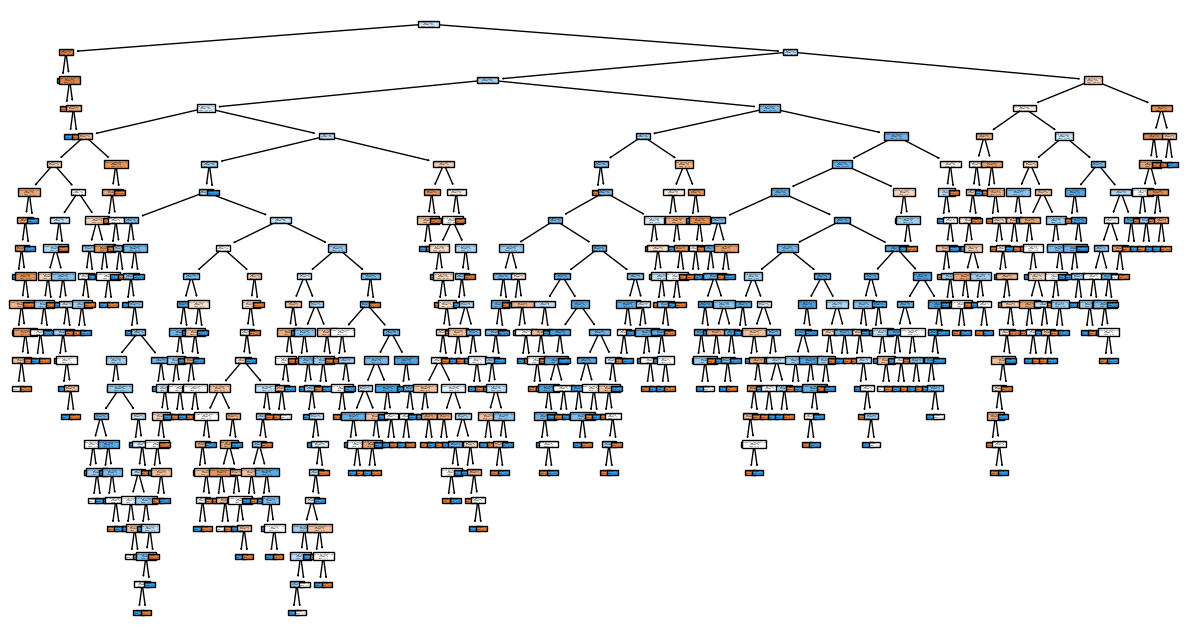

In [ ]:
fig = plt.figure(figsize=(15,8))
tree_diag = tree.plot_tree(dt_model, 
                   feature_names=X_train.columns,
                   filled=True)

In [ ]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                         Imp
Wife_age                            0.324850
No_of_children_born                 0.249632
Husband_Occupation                  0.095042
Standard_of_living_index_Very High  0.061963
Wife_ education_Tertiary            0.052172
Wife_Working_Yes                    0.040333
Wife_religion_Scientology           0.031388
Standard_of_living_index_Low        0.025066
Wife_ education_Secondary           0.023623
Husband_education_Secondary         0.022700
Husband_education_Tertiary          0.021561
Wife_ education_Uneducated          0.018615
Standard_of_living_index_Very Low   0.017410
Media_exposure _Not-Exposed         0.008938
Husband_education_Uneducated        0.006707


In [ ]:
y_predict = dt_model.predict(X_test)

In [ ]:
y_predict.shape

(418,)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels,y_predict))

              precision    recall  f1-score   support

           0       0.58      0.52      0.54       192
           1       0.62      0.68      0.65       226

    accuracy                           0.60       418
   macro avg       0.60      0.60      0.60       418
weighted avg       0.60      0.60      0.60       418



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [1,5,10,15,20],
              'min_samples_leaf':[1,5,10,15,20],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, train_labels)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 15, 20]},
             verbose=True)

In [ ]:
grid_search.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 20}

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [ ]:
credit_tree_regularized = open('d:\credit_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

credit_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                         Imp
Wife_age                            0.324850
No_of_children_born                 0.249632
Husband_Occupation                  0.095042
Wife_ education_Secondary           0.023623
Wife_ education_Tertiary            0.052172
Wife_ education_Uneducated          0.018615
Husband_education_Secondary         0.022700
Husband_education_Tertiary          0.021561
Husband_education_Uneducated        0.006707
Wife_religion_Scientology           0.031388
Wife_Working_Yes                    0.040333
Standard_of_living_index_Low        0.025066
Standard_of_living_index_Very High  0.061963
Standard_of_living_index_Very Low   0.017410
Media_exposure _Not-Exposed         0.008938


In [ ]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                         Imp
Wife_age                            0.363482
No_of_children_born                 0.309940
Husband_Occupation                  0.057390
Wife_Working_Yes                    0.047154
Standard_of_living_index_Very High  0.035145
Wife_ education_Tertiary            0.030260
Wife_ education_Secondary           0.029005
Wife_religion_Scientology           0.018757
Standard_of_living_index_Low        0.017584
Media_exposure _Not-Exposed         0.017276
Husband_education_Tertiary          0.017256
Standard_of_living_index_Very Low   0.017041
Wife_ education_Uneducated          0.015913
Husband_education_Secondary         0.013206
Husband_education_Uneducated        0.010593


In [ ]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [ ]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (975,)
ytest_predict (418,)


In [ ]:
ytest_predict

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,

In [ ]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.26190476, 0.73809524],
       [0.10144928, 0.89855072],
       [0.16438356, 0.83561644],
       [0.10144928, 0.89855072],
       [0.10526316, 0.89473684],
       [0.25      , 0.75      ],
       [0.375     , 0.625     ],
       [0.92      , 0.08      ],
       [0.5       , 0.5       ],
       [0.375     , 0.625     ],
       [0.71428571, 0.28571429],
       [0.44444444, 0.55555556],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.10144928, 0.89855072],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.375     , 0.625     ],
       [0.25      , 0.75      ],
       [0.10144928, 0.89855072],
       [0.78571429, 0.21428571],
       [0.375     , 0.625     ],
       [0.41176471, 0.58823529],
       [0.52173913, 0.47826087],
       [0.78571429, 0.21428571],
       [0.31578947, 0.68421053],
       [1.

In [ ]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.261905,0.738095
1,0.101449,0.898551
2,0.164384,0.835616
3,0.101449,0.898551
4,0.105263,0.894737


AUC: 0.823


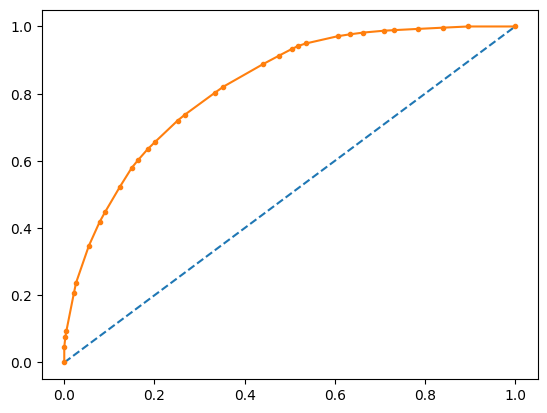

In [ ]:
probs = reg_dt_model.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.708


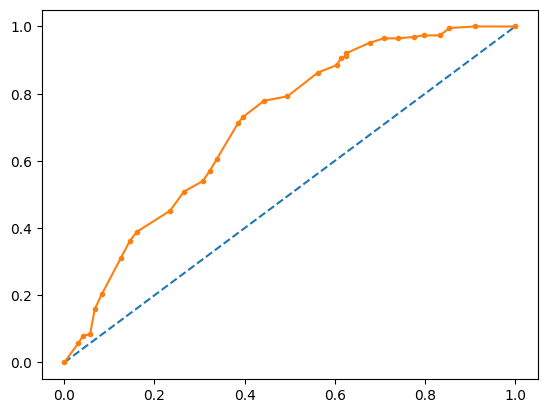

In [ ]:
probs = reg_dt_model.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.73      0.65      0.69       422
           1       0.75      0.82      0.79       553

    accuracy                           0.75       975
   macro avg       0.74      0.73      0.74       975
weighted avg       0.74      0.75      0.74       975



In [ ]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.67      0.51      0.58       192
           1       0.65      0.79      0.72       226

    accuracy                           0.66       418
   macro avg       0.66      0.65      0.65       418
weighted avg       0.66      0.66      0.65       418



In [ ]:
confusion_matrix(train_labels, ytrain_predict)

array([[273, 149],
       [ 99, 454]])

In [ ]:
confusion_matrix(test_labels, ytest_predict)

array([[ 97,  95],
       [ 47, 179]])

In [ ]:
reg_dt_model.score(X_train,train_labels)

0.7456410256410256

In [ ]:
reg_dt_model.score(X_test,test_labels)

0.6602870813397129